In [31]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [32]:
# Read in data
dat = pd.read_pickle("../../Data/New/Main_Data/Final_Dataset.pkl")
dat.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI_5-19_years,BMI_18+_years,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2014,Low income,63.0,234,64.0,0.03,9.7,492.0,17.2,22.8,86.0,58,12.00,62,625.339539,32758020.0,17.7,17.7,0.441,3.5
1,Afghanistan,2013,Low income,62.7,235,66.0,0.03,8.8,430.0,17.1,22.8,89.0,62,10.59,64,647.966460,31731688.0,17.9,18.0,0.443,3.5
2,Afghanistan,2012,Low income,62.2,242,69.0,0.04,7.9,2787.0,17.0,22.7,93.0,67,11.67,67,648.511070,30696958.0,18.2,18.2,0.442,3.4
3,Afghanistan,2011,Low income,61.7,248,71.0,0.04,8.6,3013.0,16.9,22.6,97.0,68,10.17,68,599.297630,29708599.0,18.4,18.4,0.426,3.3
4,Afghanistan,2010,Low income,61.2,255,74.0,0.03,8.6,1989.0,16.8,22.5,101.0,66,14.40,66,550.514974,28803167.0,18.6,18.7,0.421,3.2


In [33]:
# Descriptive statistics
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2070.0,2.007000e+03,4.321538e+00,2000.000000,2.003000e+03,2.007000e+03,2.011000e+03,2.014000e+03
Life_Expectancy,2070.0,6.953174e+01,8.973576e+00,36.200000,6.330000e+01,7.180000e+01,7.590000e+01,8.380000e+01
Adult_Mortality,2070.0,1.875256e+02,1.080044e+02,50.000000,1.040000e+02,1.640000e+02,2.480000e+02,6.830000e+02
Infant_Deaths,2070.0,3.482012e+01,1.356658e+02,0.006617,9.020622e-01,3.000000e+00,2.300000e+01,1.837000e+03
Alcohol,2070.0,5.032581e+00,4.085902e+00,0.000000,1.302500e+00,4.325000e+00,8.207500e+00,1.775000e+01
Percentage_Expenditure,2070.0,6.183415e+00,2.490711e+00,1.000000,4.400000e+00,5.800000e+00,7.900000e+00,1.650000e+01
Measles,2070.0,2.647650e+03,1.173415e+04,0.000000,0.000000e+00,2.600000e+01,4.935000e+02,2.121830e+05
BMI_5-19_years,2070.0,1.889705e+01,1.325683e+00,15.600000,1.780000e+01,1.920000e+01,1.980000e+01,2.330000e+01
BMI_18+_years,2070.0,2.496734e+01,2.197830e+00,19.800000,2.300000e+01,2.550000e+01,2.660000e+01,3.180000e+01
Under-Five_Deaths,2070.0,4.800040e+01,1.848080e+02,0.006617,9.521156e-01,4.000000e+00,2.900000e+01,2.527000e+03


In [34]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 3239
Data columns (total 21 columns):
Country                            2070 non-null object
Year                               2070 non-null int64
Status                             2070 non-null object
Life_Expectancy                    2070 non-null float64
Adult_Mortality                    2070 non-null int64
Infant_Deaths                      2070 non-null float64
Alcohol                            2070 non-null float64
Percentage_Expenditure             2070 non-null float64
Measles                            2070 non-null float64
BMI_5-19_years                     2070 non-null float64
BMI_18+_years                      2070 non-null float64
Under-Five_Deaths                  2070 non-null float64
Polio                              2070 non-null int64
Total_Expenditure                  2070 non-null float64
Diphtheria                         2070 non-null int64
GDP                                2070 non-null

In [35]:
# One-hot encode the categorical column

X = pd.concat([dat,
               pd.get_dummies(dat['Country'],prefix='Country')],
              axis=1)
X = pd.concat([X,
               pd.get_dummies(dat['Year'],prefix='Year')],
              axis=1)
X = pd.concat([X,
               pd.get_dummies(dat['Status'],prefix='Status')],
              axis=1)

# Drop the original categorical column and the response variable
X = X.drop(['Status','Year','Country','Life_Expectancy'], axis=1)

X.sample(50)

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI_5-19_years,BMI_18+_years,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_Composition_Of_Resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,"Country_Bahamas, The",Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bolivia,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,"Country_Congo, Dem. Rep.","Country_Congo, Rep.",Country_Croatia,Country_Cuba,Country_Cyprus,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Ecuador,"Country_Egypt, Arab Rep.",Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,"Country_Gambia, The",Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Grenada,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,"Country_Iran, Islamic Rep.",Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,"Country_Micronesia, Fed. Sts.",Country_Mongolia,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Norway,Country_Oman,Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Romania,Country_Rwanda,Country_Saudi Arabia,Country_Senegal,Country_Seychelles,Country_Singapore,Country_Slovenia,Country_Spain,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Uganda,Country_Ukraine,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB","Country_Yemen, Rep.",Country_Zambia,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Status_High income,Status_Low income,Status_Lower middle income,Status_Upper middle income
1343,208,1466.000000,1.35,3.6,64185.000000,16.3,21.0,1951.000000,66,4.40,65,792.025970,1.161978e+09,27.2,28.1,0.532,4.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
604,94,2.000000,7.55,6.8,0.000000,21.5,27.5,2.000000,92,13.80,92,12860.177645,1.699335e+07,0.8,0.9,0.785,9.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2034,233,64.000000,0.62,1.8,314.000000,16.9,21.6,86.000000,86,1.13,73,247.242701,4.848261e+07,13.3,13.6,0.471,3.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [36]:
y = dat['Life_Expectancy']
y.head()

0    63.0
1    62.7
2    62.2
3    61.7
4    61.2
Name: Life_Expectancy, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split


# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.3,
                                                 
                                                 random_state=123)

In [38]:
train_y.shape

(1449,)

In [39]:
test_y.shape

(621,)

In [40]:
train_X.shape

(1449, 174)

In [41]:
test_X.shape

(621, 174)

In [42]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
# Transform training X
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns

train_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Adult_Mortality,1449.0,0.216615,0.170908,0.0,0.085308,0.176935,0.306477,1.0
Infant_Deaths,1449.0,0.020443,0.076703,0.0,0.000487,0.001628,0.013060,1.0
Alcohol,1449.0,0.282766,0.231644,0.0,0.073883,0.241127,0.466479,1.0
Percentage_Expenditure,1449.0,0.336568,0.161895,0.0,0.220779,0.311688,0.454545,1.0
Measles,1449.0,0.013520,0.061646,0.0,0.000000,0.000113,0.002498,1.0
BMI_5-19_years,1449.0,0.430687,0.172739,0.0,0.285714,0.467532,0.545455,1.0
BMI_18+_years,1449.0,0.433707,0.183961,0.0,0.275000,0.483333,0.566667,1.0
Under-Five_Deaths,1449.0,0.020445,0.076078,0.0,0.000383,0.001579,0.012264,1.0
Polio,1449.0,0.836457,0.192386,0.0,0.760000,0.920000,0.973333,1.0
Total_Expenditure,1449.0,0.358410,0.157642,0.0,0.237161,0.346291,0.465763,1.0


In [44]:
# Transform test X
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

test_X_scale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Adult_Mortality,621.0,0.218765,0.170084,0.000000e+00,0.083728,0.183254,0.317536,0.911532
Infant_Deaths,621.0,0.015467,0.066656,-1.105709e-06,0.000486,0.001628,0.010883,0.933043
Alcohol,621.0,0.285299,0.226942,0.000000e+00,0.073239,0.255211,0.460845,0.974085
Percentage_Expenditure,621.0,0.336626,0.161489,0.000000e+00,0.227273,0.311688,0.448052,1.006494
Measles,621.0,0.010048,0.036362,0.000000e+00,0.000000,0.000156,0.001923,0.293299
BMI_5-19_years,621.0,0.422360,0.170820,0.000000e+00,0.272727,0.467532,0.545455,0.961039
BMI_18+_years,621.0,0.423390,0.181193,0.000000e+00,0.258333,0.475000,0.558333,0.991667
Under-Five_Deaths,621.0,0.015600,0.065685,-8.037933e-07,0.000366,0.001579,0.010285,0.923625
Polio,621.0,0.830703,0.193261,2.666667e-02,0.746667,0.920000,0.960000,1.000000
Total_Expenditure,621.0,0.354604,0.151347,5.349501e-03,0.242867,0.341298,0.460770,0.813837


In [45]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsRegressor(n_neighbors=5, 
                                      weights='uniform', 
                                      algorithm='auto')

In [46]:
knn5.fit(train_X_scale, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [47]:
pred_y_knn5 = knn5.predict(test_X_scale)
pred_y_knn5

array([79.34, 73.54, 53.74, 80.38, 72.76, 80.44, 68.38, 73.76, 75.04,
       78.44, 73.44, 72.84, 52.9 , 65.74, 80.84, 75.68, 78.36, 60.76,
       68.8 , 68.16, 68.02, 73.32, 71.06, 53.7 , 62.7 , 70.48, 69.08,
       63.24, 79.88, 49.68, 81.7 , 73.04, 53.42, 81.76, 81.9 , 74.82,
       73.78, 77.38, 80.74, 56.84, 72.  , 58.56, 82.52, 65.5 , 72.38,
       51.86, 60.5 , 79.66, 61.94, 76.42, 72.76, 73.2 , 70.48, 75.04,
       73.18, 59.12, 61.5 , 53.54, 53.78, 78.54, 58.96, 56.86, 52.18,
       73.04, 61.52, 74.22, 80.7 , 81.16, 67.98, 67.74, 73.04, 54.12,
       80.56, 75.42, 81.86, 78.7 , 69.9 , 58.08, 61.18, 73.54, 53.18,
       65.22, 79.82, 57.9 , 51.24, 72.68, 71.6 , 80.6 , 61.94, 78.76,
       71.84, 64.06, 78.58, 53.7 , 72.72, 57.12, 72.38, 81.76, 72.92,
       80.28, 67.48, 61.66, 74.72, 72.56, 67.04, 64.56, 73.5 , 63.18,
       72.22, 65.6 , 78.56, 73.72, 68.88, 52.78, 68.74, 76.08, 58.48,
       82.2 , 49.12, 56.4 , 72.08, 82.04, 71.54, 80.16, 74.  , 62.7 ,
       72.6 , 61.52,

In [48]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X_scale, train_y)  #fit the model
    pred=model.predict(test_X_scale) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8792746974403257
RMSE value for k=  2 is: 0.8598276238136965
RMSE value for k=  3 is: 0.9477256632195814
RMSE value for k=  4 is: 1.0721829546512882
RMSE value for k=  5 is: 1.161077294193538
RMSE value for k=  6 is: 1.2611233479582529
RMSE value for k=  7 is: 1.3922644182502393
RMSE value for k=  8 is: 1.5159396981004791
RMSE value for k=  9 is: 1.6037886794919802
RMSE value for k=  10 is: 1.672488671856381
RMSE value for k=  11 is: 1.7435253437865705
RMSE value for k=  12 is: 1.7928901438712568
RMSE value for k=  13 is: 1.863944968616288
RMSE value for k=  14 is: 1.973787337925514
RMSE value for k=  15 is: 2.057968658001417
RMSE value for k=  16 is: 2.1557557223629966
RMSE value for k=  17 is: 2.260052249896832
RMSE value for k=  18 is: 2.3474654679839846
RMSE value for k=  19 is: 2.4445541078349304
RMSE value for k=  20 is: 2.5658866921413757


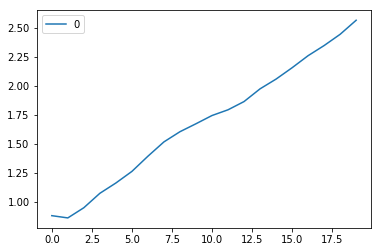

In [50]:
#plotting the mae values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#k = 2 value will give us the best result in this case

In [51]:
rsq_val = [] #to store r squared values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X_scale, train_y)  #fit the model
    pred=model.predict(test_X_scale) #make prediction on test set
    error = r2_score(test_y,pred) #calculate mae
    rsq_val.append(error) #store rmse values
    print('R squared value for k= ' , K , 'is:', error)

R squared value for k=  1 is: 0.9903903683286754
R squared value for k=  2 is: 0.9908107434285005
R squared value for k=  3 is: 0.9888359217428262
R squared value for k=  4 is: 0.985711212172746
R squared value for k=  5 is: 0.9832436333545741
R squared value for k=  6 is: 0.9802315452699432
R squared value for k=  7 is: 0.9759064364732698
R squared value for k=  8 is: 0.9714358409713272
R squared value for k=  9 is: 0.968029319710338
R squared value for k=  10 is: 0.9652316596772614
R squared value for k=  11 is: 0.9622154617255326
R squared value for k=  12 is: 0.960045569035797
R squared value for k=  13 is: 0.9568159109954407
R squared value for k=  14 is: 0.9515762624112185
R squared value for k=  15 is: 0.9473576700441425
R squared value for k=  16 is: 0.9422360763304088
R squared value for k=  17 is: 0.9365115755533837
R squared value for k=  18 is: 0.9315054502809255
R squared value for k=  19 is: 0.9257225648173161
R squared value for k=  20 is: 0.9181662338232288


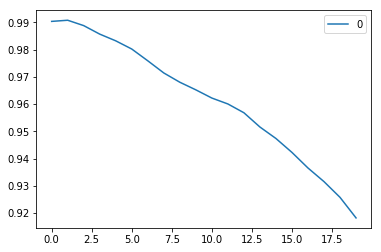

In [52]:
curve = pd.DataFrame(rsq_val) #elbow curve 
curve.plot()
#k = 2 value will give us the best result in this case

In [53]:
# KNN: K=5, default measure of distance (euclidean)
knn2 = neighbors.KNeighborsRegressor(n_neighbors=2, 
                                      weights='uniform', 
                                      algorithm='auto')

In [54]:
knn2.fit(train_X_scale, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [55]:
pred_y_knn2 = knn2.predict(test_X_scale)
print(pred_y_knn2)

[78.65 73.2  56.4  80.3  72.5  80.4  68.8  74.05 74.9  78.35 72.9  73.2
 54.2  65.7  80.7  75.5  78.1  60.7  68.95 68.25 67.75 73.95 71.   52.4
 63.15 71.1  68.65 59.95 80.45 47.   82.1  73.15 55.05 82.1  82.35 75.05
 73.85 77.65 80.5  57.15 70.95 58.35 82.65 64.6  71.9  56.7  61.85 79.8
 60.75 76.25 72.55 73.7  69.85 74.9  72.75 59.15 61.9  54.65 53.7  79.
 59.65 60.   52.55 73.25 62.   74.65 80.8  80.85 68.25 67.45 73.55 52.05
 80.2  75.35 82.1  78.55 69.85 56.95 60.   73.45 51.7  66.   79.35 58.6
 50.7  71.85 71.7  80.25 60.75 78.9  71.35 64.4  78.05 54.85 72.05 56.25
 71.95 82.1  71.85 80.3  66.7  63.05 74.2  73.55 67.7  64.15 73.9  62.35
 71.35 67.05 78.85 73.35 68.1  52.4  70.05 75.7  58.1  82.6  45.4  57.4
 72.1  82.35 71.15 80.   74.   61.45 71.4  63.   66.1  57.   67.9  57.25
 79.5  60.9  79.5  63.55 49.65 69.45 65.55 80.95 68.45 70.85 71.2  71.95
 62.5  75.2  62.1  59.85 55.8  56.6  69.85 72.4  54.2  75.35 73.95 73.7
 64.45 73.25 74.25 81.4  80.45 77.35 73.2  82.85 70.65 74.1

In [71]:
#Implementing GridSearchCV - Alternative Method

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5, return_train_score=True)
model.fit(train_X_scale,train_y)
model.best_params_

{'n_neighbors': 2}

In [72]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# test_X_scale.head()

In [76]:
#pd.DataFrame(model.cv_results_)